In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'yolo_train/runs/detect/train5/results.csv'
df = pd.read_csv(file_path)

# Print column names
print(df.columns)

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


In [19]:
df.columns = df.columns.str.strip()

epochs = df['epoch']
train_box_loss = df['train/box_loss']
val_box_loss = df['val/box_loss']
train_cls_loss = df['train/cls_loss']
val_cls_loss = df['val/cls_loss']
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
mAP50 = df['metrics/mAP50(B)']
mAP50_95 = df['metrics/mAP50-95(B)']

## Bounding Box Loss

(0.0, 1.6)

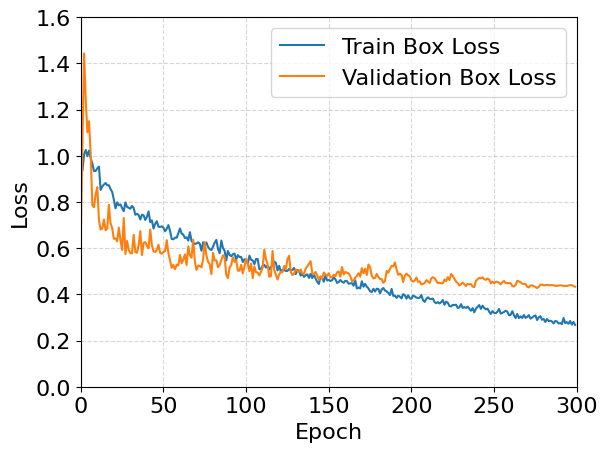

In [31]:
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 300)
plt.ylim(0, 1.6)

## Class Loss

(0.0, 5.0)

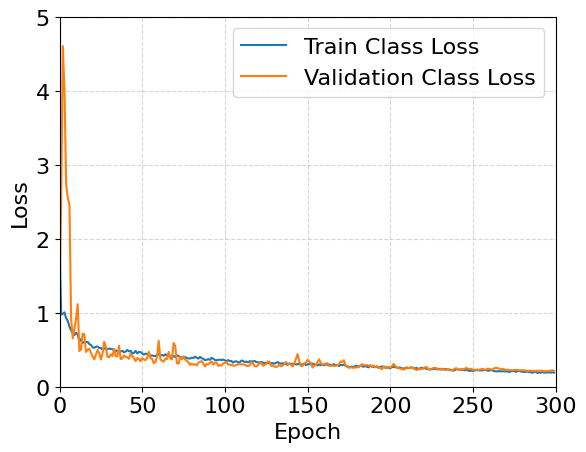

In [32]:
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, val_cls_loss, label='Validation Class Loss')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 300)
plt.ylim(0, 5)

## Precision and Recall

(0.0, 1.0)

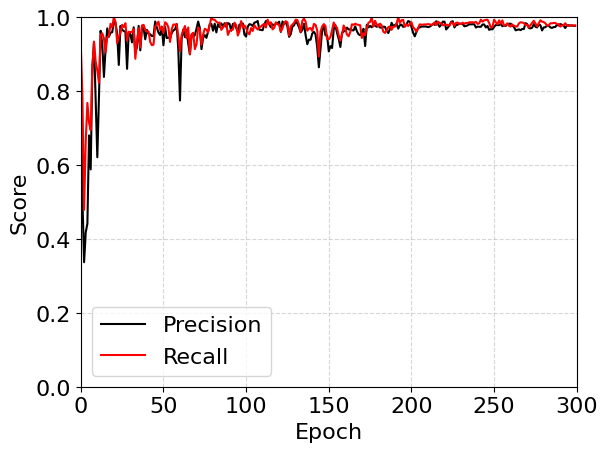

In [33]:
plt.plot(epochs, precision, label='Precision', color='k')
plt.plot(epochs, recall, label='Recall', color='r')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 300)
plt.ylim(0, 1)

(0.0, 1.0)

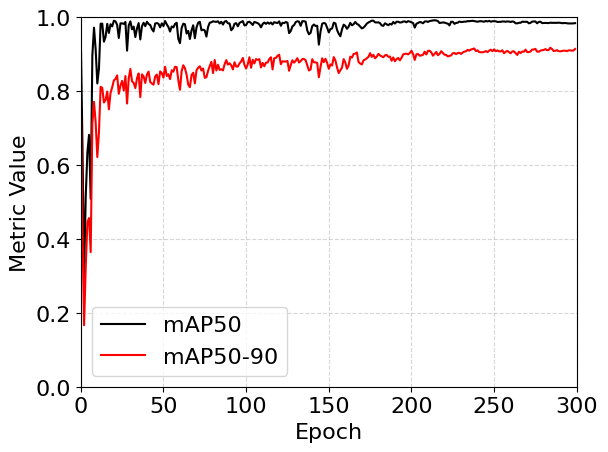

In [34]:
plt.plot(epochs, mAP50, label='mAP50', color='k')
plt.plot(epochs, mAP50_95, label='mAP50-90', color='r')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Metric Value', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 300)
plt.ylim(0, 1)

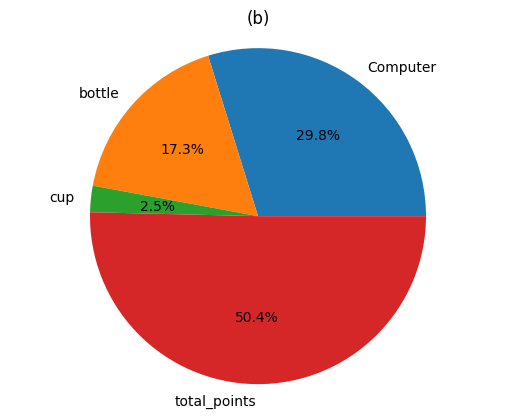

In [43]:
import matplotlib.pyplot as plt

data1 = {'raw point size':34201, 'computer': 20233, 'cup': 1721, 'bottle': 11743} # raw
data2 = {'raw point size':34201, 'Computer': 20233, 'cup': 1721, 'bottle': 11743} # downsampled no-denoising
data3 = {'raw point size':34201, 'Computer': 1755, 'cup': 201, 'bottle': 655}     # downsampled + denoised
total_points = 34201

percentages = [(value / total_points) * 100 for value in data1.values()]

labels, sizes = zip(*sorted(zip(data1.keys(), percentages)))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

plt.title('(b)')
plt.show()

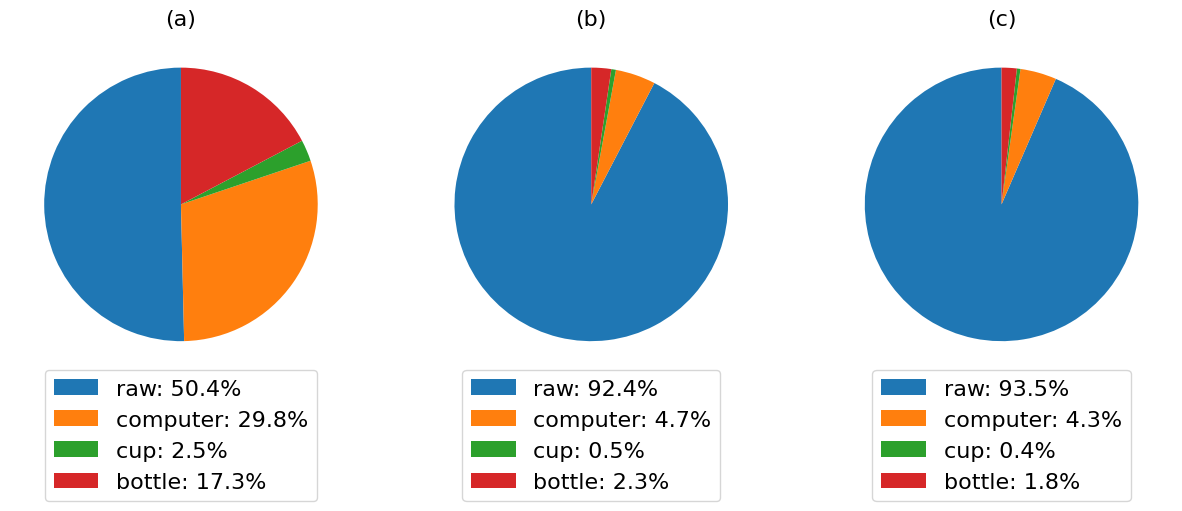

In [79]:
import matplotlib.pyplot as plt

data1 = {'raw': 34201, 'computer': 20233, 'cup': 1721, 'bottle': 11743} # raw
data2 = {'raw': 34201, 'computer': 1755, 'cup': 201, 'bottle': 869} # downsampled no-denoising
data3 = {'raw': 34201, 'computer': 1567, 'cup': 155, 'bottle': 655}     # downsampled + denoised

percentages1 = [value/sum(data1.values())*100 for value in data1.values()]
percentages2 = [value/sum(data2.values())*100 for value in data2.values()]
percentages3 = [value/sum(data3.values())*100 for value in data3.values()]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(percentages1, labels=None, autopct=None, startangle=90)
axs[0].legend(labels=['raw: {:.1f}%'.format(percentages1[0]), 'computer: {:.1f}%'.format(percentages1[1]), 
                     'cup: {:.1f}%'.format(percentages1[2]), 'bottle: {:.1f}%'.format(percentages1[3])], 
               loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=16)
axs[0].set_title('(a)', fontsize=16)

axs[1].pie(percentages2, labels=None, autopct=None, startangle=90)
axs[1].legend(labels=['raw: {:.1f}%'.format(percentages2[0]), 'computer: {:.1f}%'.format(percentages2[1]), 
                     'cup: {:.1f}%'.format(percentages2[2]), 'bottle: {:.1f}%'.format(percentages2[3])], 
               loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=16)
axs[1].set_title('(b)', fontsize=16)

axs[2].pie(percentages3, labels=None, autopct=None, startangle=90)
axs[2].legend(labels=['raw: {:.1f}%'.format(percentages3[0]), 'computer: {:.1f}%'.format(percentages3[1]), 
                     'cup: {:.1f}%'.format(percentages3[2]), 'bottle: {:.1f}%'.format(percentages3[3])], 
               loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=16)
axs[2].set_title('(c)', fontsize=16)

plt.savefig("circle_graph_point_cloud.pdf", bbox_inches='tight')

plt.show()